In [6]:
library(GeneAnswers)
library('org.Hs.eg.db')
library(caret)
library(openxlsx)

Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: RCurl

Loading required package: annotate

Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:igraph’:

    normalize, path, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames

# Use TIDE to predict responders (Amato et al.)

## Read and process data from Amato et al.

In [2]:
expression <- t(read.csv("/home/jp/ICP_Responders/ML/GideHugoRiaz_AntiPD1/Pre-processingFeatureSelection/Model testing/GSE145996_Melanoma_Immune_FPKM.txt", check.names=FALSE, sep="	"))
colnames(expression) <- expression[1,]
expression <- expression[3:nrow(expression),]
dim(expression)
expression

[1]    14 20115

,CD274,CD83,"MIR4647,NFKBIE,SLC35B2",NFKB1,NFKB2,PPP6C,"PPP6R1,TMEM86B",PPP6R2,RELA,"HLA-B,HLA-C",⋯,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
Sample_01_MB_1692,1.70986e+00,1.40795e+01,8.26896e+01,6.86929e+00,5.40256e+01,3.93078e+00,4.54053e+01,1.90621e+01,2.42328e+01,3.46855e+03,⋯,3.19902e+00,1.15330e+01,2.15398e-01,3.62708e-01,1.53010e+01,0.00000e+00,1.30244e+00,8.34690e+01,1.70370e+01,2.80840e+00
Sample_02_MB_2674,9.26617e-01,1.43558e+01,1.10078e+02,7.18699e+00,2.13601e+01,9.48971e+00,3.32080e+01,2.32628e+01,3.72764e+01,3.64884e+03,⋯,6.32825e+00,1.20277e+01,6.69960e-01,1.66920e+00,9.69400e+00,1.79567e-02,3.16809e+00,2.13506e+02,7.70055e+00,8.85843e+00
Sample_03_MB_4103,1.40566e-01,3.78687e+00,1.88939e+02,4.46024e+00,1.59364e+01,5.96592e+00,3.14053e+01,1.52816e+01,2.93945e+01,5.51884e+02,⋯,3.58282e+00,1.25850e+01,5.81401e-01,1.30054e+00,5.65156e+00,0.00000e+00,2.52052e+00,5.15735e+01,5.39559e+00,8.88363e+00
Sample_04_MB_2750,4.51264e-01,6.85738e+00,9.68727e+01,8.48591e+00,1.04931e+01,8.88702e+00,2.36175e+01,9.97830e+00,5.07890e+01,2.77366e+02,⋯,4.69078e+00,3.08020e+01,4.68166e-01,1.18203e+00,6.98154e+00,0.00000e+00,2.36231e+00,3.90655e+01,1.10496e+01,8.30021e+00
Sample_05_MB_2781,1.43912e-01,5.66215e+00,1.07308e+02,8.53134e+00,8.14618e+00,1.47178e+01,5.22661e+01,1.66929e+01,3.77961e+01,6.17023e+02,⋯,4.89644e+00,1.39279e+01,4.04877e-01,1.24570e+00,7.60890e+00,0.00000e+00,2.04878e+00,7.47339e+01,1.11223e+01,6.37146e+00
Sample_06_MB_1882,3.04719e-01,3.36278e+01,2.02360e+02,5.82250e+00,1.71778e+01,1.15120e+01,2.62219e+01,2.81147e+01,5.08007e+01,1.37864e+03,⋯,4.92425e+00,2.38592e+01,2.66253e-01,9.47566e-01,1.03837e+01,0.00000e+00,1.84467e+00,8.65665e+01,1.47008e+01,4.89474e+00
Sample_07_MB_3025,4.33797e+00,4.32775e+01,3.59592e+01,2.73384e+01,3.33706e+01,2.50883e+01,4.93569e+01,1.57431e+01,3.18713e+01,1.52481e+03,⋯,1.49796e+01,3.01808e+01,8.86820e-01,2.45053e+00,7.60845e+00,4.59389e-01,2.83801e+00,5.84159e+01,8.88562e+00,1.12049e+01
Sample_08_MB_3178,6.69988e-01,1.33586e+01,1.02870e+02,1.11796e+01,1.55228e+01,7.04854e+00,4.57725e+01,2.16686e+01,2.07442e+01,1.35505e+03,⋯,3.25084e+00,1.37403e+01,5.46730e-01,1.05910e+00,8.79789e+00,0.00000e+00,2.46056e+00,1.06278e+02,9.53387e+00,5.62300e+00
Sample_09_MB_3838,3.28910e+00,8.49617e-01,1.19056e+02,3.59974e+00,1.36191e+01,2.74738e+00,3.01298e+01,3.48201e+01,4.38820e+01,2.57232e+03,⋯,1.07657e+00,3.70015e+00,3.03673e-01,5.72022e-01,1.24590e+01,2.51401e-01,1.82435e+00,6.61014e+01,1.05082e+01,4.29746e+00
Sample_10_MB_2786,1.97310e-01,5.52707e+00,1.17381e+02,7.64725e+00,9.42208e+00,1.21668e+01,5.83784e+01,1.82827e+01,3.85948e+01,7.21320e+02,⋯,4.20328e+00,1.24458e+01,3.69725e-01,1.27491e+00,7.64801e+00,0.00000e+00,1.91992e+00,7.59998e+01,1.03328e+01,5.98021e+00


### Format the data
#### Separated Columns
Some columns have gene expression for multiple genes<br>
Breaking those genes into separate columns

In [3]:
expr <- expression
for (i in colnames(expr)) {
    split_obj <- strsplit(i, ",")[[1]]
    if(length(split_obj) > 1){
#         print(split_obj)
        for (j in split_obj){
            expr <- cbind(expr, tmp=expr[,i])
            colnames(expr)[ncol(expr)] <- j
        }
    }
    
}
# removing all columns with multiple genes
remove <- grep(",", colnames(expr))
expr <- expr[, -remove]
row_names <- row.names(expr)
expr <- apply(expr, 2, as.numeric)
row.names(expr) <- row_names 
head(expr)

,CD274,CD83,NFKB1,NFKB2,PPP6C,PPP6R2,RELA,HLA-C,HLA-DQB2,HLA-DPB1,⋯,ZNF621,ZNF670,ZNF670-ZNF695,ZNF695,ZNF69,ZNF700,ZNF746,ZNF767P,ZNF780A,ZNF780B
Sample_01_MB_1692,1.709860,14.07950,6.86929,54.02560,3.93078,19.0621,24.2328,0.0000,13.128000,37.06150,⋯,9.908190,1.44021,1.44021,1.44021,10.02540,10.02540,13.89420,13.89420,2.98094,2.98094
Sample_02_MB_2674,0.926617,14.35580,7.18699,21.36010,9.48971,23.2628,37.2764,0.0000,2.000370,11.80040,⋯,3.384830,3.01956,3.01956,3.01956,9.98321,9.98321,9.43907,9.43907,2.31031,2.31031
Sample_03_MB_4103,0.140566,3.78687,4.46024,15.93640,5.96592,15.2816,29.3945,88.9503,2.705590,10.07920,⋯,0.493359,1.26823,1.26823,1.26823,2.97304,2.97304,9.05069,9.05069,2.87643,2.87643
Sample_04_MB_2750,0.451264,6.85738,8.48591,10.49310,8.88702,9.9783,50.7890,382.8110,0.178607,8.69620,⋯,4.101550,2.85478,2.85478,2.85478,7.30161,7.30161,5.14282,5.14282,1.78122,1.78122
Sample_05_MB_2781,0.143912,5.66215,8.53134,8.14618,14.71780,16.6929,37.7961,0.0000,1.502180,8.80717,⋯,4.059610,1.51632,1.51632,1.51632,5.78163,5.78163,13.46300,13.46300,3.03626,3.03626
Sample_06_MB_1882,0.304719,33.62780,5.82250,17.17780,11.51200,28.1147,50.8007,352.7650,1.838130,34.20850,⋯,2.881340,1.39493,1.39493,1.39493,4.27304,4.27304,7.97705,7.97705,2.20541,2.20541


#### Map Gene Names to Entrez IDs

In [4]:
# mapping gene names to Entrez IDs
colnames(expr) <- mapIds(org.Hs.eg.db, colnames(expr), 'ENTREZID', 'ALIAS')

'select()' returned 1:many mapping between keys and columns



#### Remove Duplicates

In [5]:
# Remove duplicate columns
res <- list()
uniqCname <- unique(colnames(expr))
for (i in 1:length(uniqCname)){
    Cname <- uniqCname[i]
    count <- length(which(colnames(expr) %in% Cname))
    pos <- which(colnames(expr) %in% Cname)
    if(count > 1){
        tmp <- expr[, pos]
        tmp.mean <- colMeans(tmp)
        tmp.mean.max <- max(tmp.mean)
        final_pos <- which(tmp.mean %in% tmp.mean.max)[1]
        tmp <- tmp[, final_pos]
    }else{
        tmp <- expr[,pos]
    }
    res[[i]] <- tmp
    names(res)[i] <- Cname 
}

expr_unique <- do.call(cbind, res)

# To convert to log2(x+1)

# Add 1 to all values
expr_unique <- expr_unique + 1

# convert values to log
expr_unique <- log(expr_unique, 2)

In [11]:
amato <- t(expr_unique)
amato <- cbind(as.integer(as.character(rownames(amato))), data.frame(amato, row.names=NULL))
colnames(amato)[1] <- ""
head(amato)

Warning message in eval(quote(list(...)), env):
“NAs introduced by coercion”


,,Sample_01_MB_1692,Sample_02_MB_2674,Sample_03_MB_4103,Sample_04_MB_2750,Sample_05_MB_2781,Sample_06_MB_1882,Sample_07_MB_3025,Sample_08_MB_3178,Sample_09_MB_3838,Sample_10_MB_2786,Sample_11_MB_2855,Sample_12_MB_3316,Sample_13_MB_3432,Sample_14_MB_4117
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,29126,1.438218,0.9460698,0.1897499,0.537310,0.1939761,0.3837391,2.416291,0.7398377,2.1006750,0.2597967,0.657565,0.4051962,1.6039384,1.074081
2,9308,3.914517,3.9407118,2.2590826,2.974048,2.7359878,5.1138588,5.468502,3.8438432,0.8872266,2.7064355,2.258073,3.5366746,0.9401532,3.527508
3,4790,2.976233,3.0333331,2.4489644,3.245786,3.2526791,2.7703005,4.824686,3.6063948,2.2015523,3.1122414,3.123171,3.6157459,3.4088844,3.478972
4,4791,5.782031,4.4828547,4.0820553,3.522696,3.1931693,4.1841057,5.103103,4.0463863,3.8697826,3.3815713,4.520466,4.2486639,5.4021662,3.768809
5,5537,2.301816,3.3909029,2.8003139,3.305536,3.9743274,3.6452405,4.705331,3.0087271,1.9058823,3.7188329,3.248908,3.2132182,3.3165397,4.143663
6,9701,4.326401,4.6006741,4.0251706,3.456583,4.1450986,4.8636758,4.065495,4.5026234,5.1626975,4.2692352,4.705154,4.2616136,3.8006204,3.556736


## Write into csv

In [12]:
write.table(amato, "Amato.csv", sep="\t")

## Predict using TIDE
DIDN'T USE THIS, USED COMMAND LINE

In [15]:
system("tidepy Amato.csv -o Amato.txt -c Melanoma")

Warning message in system("tidepy Amato.csv -o Amato.txt -c Melanoma"):
“error in running command”


## Predictions

In [26]:
amato_results <- read.csv("Amato.txt", check.names=FALSE, sep="	")
colnames(amato_results)[1] <- "Patient"
amato_results <- amato_results[order(amato_results$Patient),]
amato_results

,Patient,No benefits,Responder,TIDE,IFNG,MSI Score,CD274,CD8,CTL.flag,Dysfunction,Exclusion,MDSC,CAF,TAM M2,CTL
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10,Sample_01_MB_1692,False,True,-0.041996697,-0.5268719,0.3032143,0,-0.7001618,False,0.020159576,-0.04199670,0.0014822821,0.007020533,-9.418035e-03,-0.6785255
11,Sample_02_MB_2674,False,True,-0.043176725,-0.9338214,0.3068466,0,-1.0895350,False,-0.001201873,-0.04317672,-0.0098533577,0.002715876,1.327200e-03,-0.8263693
5,Sample_03_MB_4103,False,False,0.128303334,-0.6132450,0.2834049,0,-0.6839878,False,-0.049917584,0.12830333,0.0063936682,0.010889047,9.649566e-04,-0.8204185
7,Sample_04_MB_2750,False,False,0.042767711,-0.8105523,0.2589807,0,-0.4312110,False,-0.013261884,0.04276771,0.0048412670,0.010235165,-4.661306e-03,-0.6662048
12,Sample_05_MB_2781,False,True,-0.050327559,-0.9397546,0.2918013,0,-0.7956071,False,-0.024474730,-0.05032756,-0.0015246766,0.009955759,-1.300365e-02,-0.6719895
3,Sample_06_MB_1882,False,False,0.141999220,-0.5808567,0.2922375,0,-0.8397458,False,-0.035363219,0.14199922,0.0077360425,0.013286437,-9.019183e-04,-0.8964636
15,Sample_07_MB_3025,False,True,-0.254472557,-0.2323313,0.3277689,0,-1.1611213,False,0.024587791,-0.25447256,-0.0012998687,-0.009634233,-1.988967e-02,-0.7109210
1,Sample_08_MB_3178,False,False,0.265739773,-0.7519782,0.2913651,0,-0.7084213,False,-0.029336170,0.26573977,0.0088170341,0.023685188,7.869193e-03,-0.6269947
14,Sample_09_MB_3838,False,True,-0.232182893,-0.6794168,0.3044786,0,-0.7497888,False,-0.010521201,-0.23218289,0.0040746406,-0.012035184,-1.675545e-02,-0.6831307


In [32]:
pred <- amato_results[1:14, ]$Responder
actual <- c('True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'False', 'False', 'False', 'False', 'False', 'False' )

## Accuracy

In [37]:
confusionMatrix(data = as.factor(pred), reference = as.factor(actual), positive = "True")

Confusion Matrix and Statistics

          Reference
Prediction False True
     False     3    4
     True      3    4
                                          
               Accuracy : 0.5             
                 95% CI : (0.2304, 0.7696)
    No Information Rate : 0.5714          
    P-Value [Acc > NIR] : 0.7918          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : 1.0000          
                                          
            Sensitivity : 0.5000          
            Specificity : 0.5000          
         Pos Pred Value : 0.5714          
         Neg Pred Value : 0.4286          
             Prevalence : 0.5714          
         Detection Rate : 0.2857          
   Detection Prevalence : 0.5000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : True            
                     

In [38]:
pred
actual

[1] "True"  "True"  "False" "False" "True"  "False" "True"  "False" "True" 
[10] "True"  "False" "True"  "False" "False"

[1] "True"  "True"  "True"  "True"  "True"  "True"  "True"  "True"  "False"
[10] "False" "False" "False" "False" "False"

# Use TIDE to predict responders (Liu et al.)

## Read and process data from Liu et al.

In [39]:
expr <- read.csv("/home/jp/ICP_Responders/ML/GideHugoRiaz_AntiPD1/Pre-processingFeatureSelection/Model testing/41591_2019_654_MOESM3_ESM.txt", check.names=FALSE, sep="	")
colnames(expr)[1] <- "Patient"
expr <- expr[order(expr$Patient), ]
head(expr)

,Patient,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A3GALT2,A4GALT,A4GNT,⋯,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
61,Patient1,0.1302644,0.0000000,0.0651322,287.13529,0.19539659,0.42335928,0.0000000,0.1628305,0.16283049,⋯,6.350389,2.540156,2.4098913,2.116796,2.996081,0.03256610,9.151074,20.97257,22.30778,18.07418
7,Patient10,10.0499299,0.7205610,0.0000000,120.25784,0.15169706,0.13273492,0.1137728,1.3652735,0.07584853,⋯,47.575989,25.409257,0.9101823,4.171669,10.391248,0.01896213,20.573913,71.67686,17.86233,14.48707
1,Patient100,19.6142415,0.8267887,0.0351825,504.95677,0.84437990,0.22868622,0.3518250,8.2151128,0.84437990,⋯,23.818550,10.695479,3.8173008,3.008103,12.964750,0.52773744,14.143363,204.83249,58.43813,12.94716
2,Patient102,20.0754271,0.5557212,0.2083954,811.09820,0.30101563,0.00000000,0.0000000,2.3155049,0.67149641,⋯,18.639814,6.506569,2.6396755,3.565877,13.568858,0.06946515,27.786058,240.88197,36.00610,16.27800
3,Patient105,13.0091690,0.0000000,0.0000000,108.48186,0.64910615,0.05409218,0.1081844,0.5679679,0.13523045,⋯,44.869462,7.708135,0.6220601,2.028457,4.624881,0.05409218,25.098771,20.01411,11.46754,33.42897
4,Patient106,18.3631301,0.9027153,0.0000000,93.81113,0.09502267,0.11877833,0.0000000,0.4276020,0.11877833,⋯,11.664032,11.022629,1.9004533,3.159504,8.528284,0.02375567,19.432135,42.59391,30.16970,17.88802


### Convert to log2(x+1)

In [43]:
# Add 1 to all values
expr[2:ncol(expr)] <- expr[2:ncol(expr)] + 1

# convert values to log
expr[2:ncol(expr)] <- log(expr[2:ncol(expr)], 2)

### Map Gene Names to Entrez IDs

In [45]:
# mapping gene names to Entrez IDs
colnames(expr)[2:ncol(expr)] <- mapIds(org.Hs.eg.db, colnames(expr)[2:ncol(expr)], 'ENTREZID', 'ALIAS')

'select()' returned 1:many mapping between keys and columns



## Read Clinical Data

In [48]:
clinical <- read.xlsx("/home/jp/ICP_Responders/ML/GideHugoRiaz_AntiPD1/Pre-processingFeatureSelection/Model testing/41591_2019_654_MOESM4_ESM.xlsx", sheet=1, startRow = 3)
clinical <- clinical[1:144,]
colnames(clinical)[1] <- "Patient"
clinical <- clinical[,c("Patient", "gender.(Male=1,.Female=0)", "BR", "priorCTLA4")]
clinical <- clinical[clinical$priorCTLA4 == 0, ]
clinical <- clinical[order(clinical$Patient), ]
colnames(clinical)[2:3] <- c("Gender", "Response")
clinical[clinical == "PD"] <- 'False'
clinical[clinical == "SD"] <- 'False'
clinical[clinical == "PR"] <- 'True'
clinical[clinical == "MR"] <- 'True'
clinical[clinical == "CR"] <- 'True'
clinical$Response <- as.factor(clinical$Response)
table(clinical$Response)
dim(clinical)
head(clinical)


False  True 
   48    36 

[1] 84  4

,Patient,Gender,Response,priorCTLA4
,<chr>,<dbl>,<fct>,<dbl>
4,Patient102,1,True,0
5,Patient104,0,True,0
6,Patient105,0,True,0
7,Patient106,0,True,0
8,Patient107,1,True,0
9,Patient108,1,False,0


In [56]:
liu <- t(expr)
colnames(liu) <- liu[1, ]
liu <- liu[2:nrow(liu), ]
liu <- cbind(as.integer(as.character(rownames(liu))), data.frame(liu, row.names=NULL))
colnames(liu)[1] <- ""
liu[,2:ncol(amato)] <- lapply(liu[,2:ncol(liu)], function (x) as.double(as.character(x)))
head(liu)

Warning message in `[<-.data.frame`(`*tmp*`, , 2:ncol(amato), value = list(Patient1 = c(0.1766603, :
“provided 121 variables to replace 14 variables”


,,Patient1,Patient10,Patient100,Patient102,Patient105,Patient106,Patient107,Patient108,Patient11,⋯,Patient8,Patient82,Patient83,Patient86,Patient87,Patient9,Patient94,Patient96,Patient98,Patient99
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,0.1766603,3.4659653,4.36556950,4.3974900,3.80829950,4.2752403,0.000000,0.6835101,4.62599180,⋯,4.3619041,3.8817449,4.3234314,2.5501947,2.3098123,4.2255402,3.9206857,3.9915155,3.8175690,4.3921305
2,503538,0.0000000,0.7828791,0.86930970,0.6375835,0.00000000,0.9280597,0.000000,0.0000000,1.26841540,⋯,1.2042214,1.0081858,0.8540515,1.0020831,0.5614420,0.8498939,0.8280460,1.2242973,1.1610545,0.8600133
3,29974,0.0910325,0.0000000,0.04988513,0.2730926,0.00000000,0.0000000,0.000000,0.0000000,0.00000000,⋯,0.20592661,0.00000000,0.07251337,0.00000000,0.08009715,0.00000000,0.02702556,0.00000000,0.12002202,0.00000000
4,2,8.1706030,6.9219340,8.98287000,9.6655100,6.77454800,6.5669840,9.080957,9.4457240,7.97983500,⋯,8.756686,11.507188,8.556122,9.034985,7.690279,6.695161,8.368644,8.187433,9.771671,9.509542
5,144571,0.2574893,0.2037613,0.88313585,0.3796383,0.72168426,0.1309607,0.000000,0.0000000,0.09089313,⋯,0.77904312,1.32171612,0.31098311,0.89935996,0.61620025,0.07770206,0.38133653,0.32998821,0.72302192,0.59624700
6,144568,0.5092999,0.1798103,0.29711653,0.0000000,0.07600103,0.1619242,0.000000,0.0000000,0.42956021,⋯,0.03642759,0.00000000,0.53280654,0.49871516,0.02719616,0.32078604,1.97487202,0.26975429,0.09093957,0.20368748


## Write into csv

In [57]:
write.table(liu, "Liu.csv", sep="\t")

## Predict using TIDE
DIDN'T USE THIS, USED COMMAND LINE

In [ ]:
system("tidepy Liu.csv -o Liu.txt -c Melanoma")

## Predictions

In [58]:
liu_results <- read.csv("Liu.txt", check.names=FALSE, sep="	")
colnames(liu_results)[1] <- "Patient"
liu_results <- liu_results[order(liu_results$Patient),]
liu_results

,Patient,No benefits,Responder,TIDE,IFNG,MSI Score,CD274,CD8,CTL.flag,Dysfunction,Exclusion,MDSC,CAF,TAM M2,CTL
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
43,Patient1,False,False,0.05865191,-0.29920632,0.4400797,0,-0.23348817,False,-0.075671675,0.05865191,0.0054219528,-5.125800e-04,-0.0022898413,-0.35458834
85,Patient10,False,True,-0.09155254,0.08015465,0.5042584,0,0.02561329,False,0.014630774,-0.09155254,0.0056342347,-2.696955e-02,0.0132244152,-0.05144825
29,Patient100,False,False,0.09422036,-0.22940517,0.5140048,0,0.67349083,False,0.028105729,0.09422036,0.0177476432,4.199002e-05,-0.0011491899,0.43360887
16,Patient102,False,False,0.16215140,-0.08990118,0.5018180,0,0.25149220,False,0.143407952,0.16215140,0.0093452266,2.224428e-02,-0.0079481809,0.09516027
15,Patient105,False,False,0.16761951,-0.18003552,0.4265446,0,-1.35501560,False,0.095005739,0.16761951,0.0238427093,5.921881e-04,-0.0061306811,-0.80869136
58,Patient106,False,False,0.01310681,-0.49159296,0.4699030,0,0.07590740,False,0.007107347,0.01310681,0.0125277390,-2.055275e-02,0.0089882381,-0.12102120
113,Patient107,False,True,-0.21954690,-0.38177527,0.3817133,0,-2.16417078,False,0.021528094,-0.21954690,-0.0134447449,-1.277422e-02,-0.0023352618,-1.43849956
55,Patient108,False,False,0.02447473,-0.37677489,0.3411727,0,-0.82813737,False,0.050451179,0.02447473,-0.0090534211,-5.380216e-04,0.0115623372,-0.76599338
91,Patient11,False,True,-0.10690364,-0.19919112,0.4499459,0,-0.01883569,False,-0.006394601,-0.10690364,-0.0039706048,-5.063198e-03,-0.0057734991,-0.06185765


### Mapping predictions to actual response

In [63]:
dim(liu_results)
dim(clinical)

[1] 122  15

[1] 84  4

In [61]:
predict_actual <- merge(liu_results[, c("Patient", "Responder")], clinical[, c("Patient", "Response")], by = 'Patient')
predict_actual$Responder <- as.factor(predict_actual$Responder)
predict_actual

Patient,Responder,Response
<chr>,<fct>,<fct>
Patient102,False,True
Patient105,False,True
Patient106,False,True
Patient107,True,True
Patient108,False,False
Patient112,True,False
Patient116,False,False
Patient125,True,True
Patient126,True,True


## Accuracy

In [64]:
confusionMatrix(data = predict_actual$Responder, reference = predict_actual$Response, positive = "True")

Confusion Matrix and Statistics

          Reference
Prediction False True
     False    25   19
     True     16   14
                                          
               Accuracy : 0.527           
                 95% CI : (0.4075, 0.6443)
    No Information Rate : 0.5541          
    P-Value [Acc > NIR] : 0.7214          
                                          
                  Kappa : 0.0343          
                                          
 Mcnemar's Test P-Value : 0.7353          
                                          
            Sensitivity : 0.4242          
            Specificity : 0.6098          
         Pos Pred Value : 0.4667          
         Neg Pred Value : 0.5682          
             Prevalence : 0.4459          
         Detection Rate : 0.1892          
   Detection Prevalence : 0.4054          
      Balanced Accuracy : 0.5170          
                                          
       'Positive' Class : True            
                     

# Use TIDE to predict responders (TIDE train set)

## Read train set

In [19]:
test <- readRDS("/home/jp/ICP_Responders/DataCollectionFormatting/MergeTables/GideHugoRiaz_AntiPD1_test.rds")

In [23]:
actual_response <- test[,c("Patient","Response")]
actual_response <- actual_response[order(actual_response$Patient),]
actual_response[actual_response$Response==0, "Response"] <- "False"
actual_response[actual_response$Response==1, "Response"] <- "True"
actual_response$Response <- as.factor(actual_response$Response)


test_inp  <- as.data.frame(t(test[,1:ncol(test)-1]))
colnames(test_inp) <- test_inp[1, ]
test_inp <- test_inp[8:nrow(test_inp), ]
row_names <- rownames(test_inp)
test_inp <- apply(test_inp, 2, function(x){as.numeric(x)})
test_inp <- as.data.frame(cbind(as.integer(row_names), test_inp))
colnames(test_inp)[1] <- ""
rownames(test_inp) <- NULL
head(actual_response)
dim(test_inp)
head(test_inp)

,Patient,Response
,<int>,<fct>
55,1,False
57,3,True
83,4,False
45,5,False
3,11,False
4,12,False


[1] 16010    19

,,11,12,21,25,34,36,40,5,52,1,3,13,16,21,4,13,16,36
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,-1.1698285,-0.04601746,0.9276735,0.71843750,1.4464503,-0.061813452,-0.1970813,0.49017147,0.2569050,-0.628439742,-0.8206699,-0.962296214,-0.4231313,0.2344168,-0.7291341,0.5847263,0.2545305,0.9777502
2,503538,-0.6828899,1.50286786,0.3519548,-0.04759832,0.3285436,-0.002624338,0.2831535,-0.25789926,0.1961308,0.273134519,-0.2185513,-0.227923423,-0.3273048,0.9769045,1.1829720,0.9744468,-0.5304960,2.0752102
3,2,-0.8272336,-0.84960551,0.3382947,0.73705744,0.3266724,0.981953780,1.1864752,-0.67680949,-1.8164002,-0.987658985,0.5062774,1.598636609,-1.2104770,1.3155037,2.0723894,-0.5239342,0.7245960,-1.8386027
4,144571,-0.4466098,-0.70254659,-0.4354129,0.25330891,-0.3007491,0.756623465,0.3921006,0.03061804,-0.4354129,0.398783052,-0.5085222,-0.003057041,-0.5085222,0.1317165,0.5401983,0.4686214,-0.0783257,0.1870061
5,144568,4.9701435,0.63181953,-1.0177036,0.48117817,-1.0177036,-1.017703568,-1.0177036,-0.80238739,-1.0177036,-0.173196910,-0.1692946,-0.196994667,-0.2338487,-0.2662473,-0.3038514,-0.2137876,-0.3062972,-0.2815238
6,53947,1.2678120,1.41893626,-0.8808538,-0.01190033,-0.7772134,-0.453767465,0.1755965,0.13894472,-0.5948460,-0.009185952,-0.2512020,0.073937659,-0.8345972,0.7559917,-0.6511810,-0.5082910,0.3712775,-0.8447749


## Write into csv

In [9]:
write.table(test_inp, "GideHugoRiaz_testset.csv", sep="\t")

## Predict using TIDE
DIDN'T USE THIS, USED COMMAND LINE

In [ ]:
system("tidepy GideHugoRiaz_testset.csv -o GideHugoRiaz_testset.txt -c Melanoma")

## Predictions

In [31]:
tide_results <- read.csv("GideHugoRiaz_testset.txt", check.names=FALSE, sep="	")
colnames(tide_results)[1] <- "Patient"
tide_results <- tide_results[order(tide_results$Patient),]
tide_results

,Patient,No benefits,Responder,TIDE,IFNG,MSI Score,CD274,CD8,CTL.flag,Dysfunction,Exclusion,MDSC,CAF,TAM M2,CTL
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,False,False,0.32124651,2.595838e-01,0.4292929,0,2.290955e-01,False,-0.131590516,0.32124651,0.0153232057,0.0149503826,0.0149524021,2.109771e-02
11,11,False,True,-0.04188959,1.794658e-01,0.5285122,0,-2.950946e-01,False,0.008643621,-0.04188959,-0.0065268892,0.0015577418,-0.0070819679,2.027846e-01
9,12,False,False,0.02374888,3.158865e-01,0.4878401,0,7.852386e-01,False,0.051431921,0.02374888,-0.0037962846,-0.0044173745,0.0101072420,3.805798e-01
12,13,False,True,-0.04892013,6.054745e-01,0.5919538,0,2.710791e-01,False,0.054693173,-0.04892013,-0.0031215528,-0.0136226126,0.0168332291,3.957562e-01
14,13.1,False,True,-0.07797047,-2.709158e-01,0.5347781,0,9.970652e-02,False,0.050138503,-0.07797047,-0.0022977724,0.0035811039,-0.0105790850,4.894321e-01
3,16,False,False,0.25031404,-5.005198e-01,0.3858469,0,-3.630908e-01,False,-0.071318715,0.25031404,0.0094032396,0.0181573871,0.0052748279,-5.448423e-01
13,16.1,False,True,-0.06633135,-4.845656e-02,0.5301257,0,-7.943441e-02,False,0.050151248,-0.06633135,0.0138662507,-0.0055802353,-0.0160919069,-6.287129e-02
5,21,False,False,0.05118310,6.535635e-02,0.6346462,0,7.419946e-02,False,0.013510778,0.05118310,0.0035838155,0.0026187951,0.0044565846,-3.581784e-03
6,21.1,False,False,0.04477755,2.306652e-01,0.5767526,0,5.975139e-01,False,0.016994805,0.04477755,0.0083457204,-0.0021160273,0.0004904034,1.338318e-01


## Accuracy

In [33]:
cm <- confusionMatrix(data = actual_response$Response, reference = as.factor(tide_results$Responder[1:18]), positive = "True")
cm

Confusion Matrix and Statistics

          Reference
Prediction False True
     False     5    6
     True      4    3
                                          
               Accuracy : 0.4444          
                 95% CI : (0.2153, 0.6924)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 0.7597          
                                          
                  Kappa : -0.1111         
                                          
 Mcnemar's Test P-Value : 0.7518          
                                          
            Sensitivity : 0.3333          
            Specificity : 0.5556          
         Pos Pred Value : 0.4286          
         Neg Pred Value : 0.4545          
             Prevalence : 0.5000          
         Detection Rate : 0.1667          
   Detection Prevalence : 0.3889          
      Balanced Accuracy : 0.4444          
                                          
       'Positive' Class : True            
                     

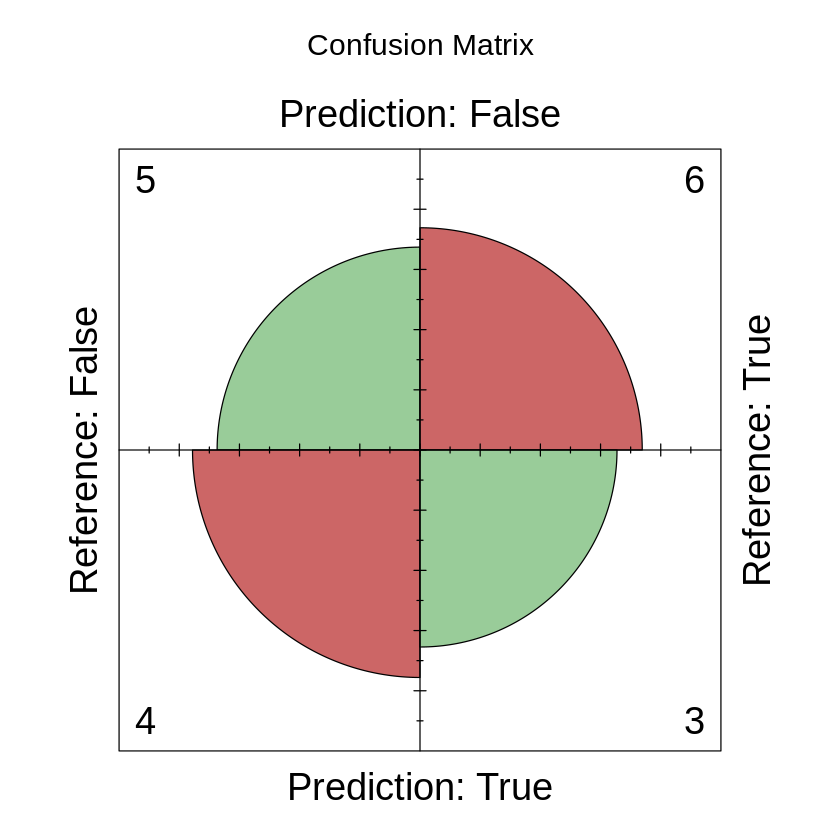

In [36]:
fourfoldplot(cm$table, color = c("#99CC99", "#CC6666"),
             conf.level = 0, margin = 1, main = "Confusion Matrix")

In [30]:
actual_response

,Patient,Response
,<int>,<fct>
55,1,False
57,3,True
83,4,False
45,5,False
3,11,False
4,12,False
67,13,True
92,13,False
70,16,False


In [ ]:
system("file Hugo2016_Copy_Melanoma.self_subtract")

In [ ]:
file.info("Hugo2016_Copy_Melanoma.self_subtract")

In [8]:
self_subtract <- read.csv("Hugo2016_Copy_Melanoma.self_subtract", sep="\t", check.names=FALSE)
self_subtract

,Pt1,Pt10,Pt12,Pt13,Pt14,Pt15,Pt19,Pt2,Pt20,⋯,Pt32,Pt35,Pt37,Pt38,Pt4,Pt5,Pt6,Pt7,Pt8,Pt9
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
114787,-0.23521436,0.252318052,0.83595091,-0.63540721,-0.07374131,0.410775851,1.19025669,-0.01145571,-1.41901174,⋯,-1.351394053,0.20188781,1.42934956,0.353008680,0.01548565,-1.12480490,-0.6662560664,-0.09280668,-0.45057002,1.11932909
114786,-0.02708832,-0.037094347,-0.03433882,-0.01835752,-0.01950423,-0.041510099,-0.04151010,-0.02810355,-0.04151010,⋯,-0.041510099,-0.04151010,-0.04151010,0.841389344,-0.03344338,-0.01097980,-0.0239576352,-0.04151010,-0.04151010,-0.03626785
114785,-0.29523090,-0.747417889,0.12523051,-0.63011573,-0.64733078,0.469516922,1.11352033,-0.18132916,-0.55370832,⋯,0.275641982,-0.09706402,0.15844401,0.068743323,-0.10016889,-0.34491688,-0.8046865019,2.72081645,0.20097547,-0.95234261
114784,0.02032660,-0.080931358,-0.00581284,-0.05865115,2.08628206,-0.159070391,0.01285995,-0.17445108,-0.16526916,⋯,-0.162934713,-0.13215758,-0.13103067,-0.031746127,-0.12852661,-0.03814667,-0.0005291942,-0.06743590,-0.15489871,-0.17881977
145200,0.16089957,0.132900670,1.00748068,-0.48835538,-0.29203781,0.720255775,-0.54550127,-0.19095068,0.27146496,⋯,-0.513275234,-0.69346679,-0.33787874,0.708541253,-0.59008905,0.58069270,2.7250065928,-0.28977869,-0.58455568,-0.46183656
221545,0.04462990,-0.468895689,-0.32628062,-0.32021561,-0.03283483,0.135523376,0.84110656,-0.35314717,-0.36266219,⋯,-0.375771171,0.07207167,1.27622043,-0.284130070,-0.01091552,0.77811552,0.2213114785,-0.14807215,0.22982149,-0.35566305
114781,0.53459518,-0.944435870,-0.52390836,0.41742397,-0.15898572,0.187383604,-0.36093121,-0.68413990,-0.31019709,⋯,-0.003867772,0.01343904,0.97877169,-0.227739056,0.31439544,0.72082388,0.9939842669,-0.39807456,-0.04926857,-0.68372867
114780,0.73711199,-0.620746325,-0.46031200,-0.63318622,-0.34611964,0.990858039,0.41229269,1.35618377,-0.13817816,⋯,-0.646311441,-0.07728177,0.86274739,-0.627747168,0.15967271,0.90585025,0.4592670186,-0.42856359,0.34203444,-0.30360864
10611,1.05233988,0.088469220,0.47537166,0.34213604,-1.41691406,-1.165287473,-0.43037048,-0.31287881,-0.68905101,⋯,0.263907882,0.70699102,0.14711915,-0.169933588,0.07217447,1.50843144,0.4281525567,-0.12441664,-0.10074463,-0.22878526


In [ ]:
str(self_subtract)